<a href="https://colab.research.google.com/github/mintseok/MachineLearning/blob/main/3%EC%A3%BC%EC%B0%A8/%ED%97%88%EB%AF%BC%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -O https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/dataset/mnist.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3655  100  3655    0     0  18275      0 --:--:-- --:--:-- --:--:-- 18275


In [2]:
import sys, os
import pickle
import numpy as np
from mnist import load_mnist
sys.path.append(os.pardir)

In [3]:
# 시그모이드 함수 정의하기
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [8]:
# 소프트맥스 함수 정의하기
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = np.sum(exp_x)
  return exp_x / sum_exp_x

In [5]:
# mnist.py에 있는 load_mnist() 함수를 사용해 변수에 저장
# 궁금하다면 matplotlib의 pyplot을 이용하여 그림 출력해보기

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl

View Raw -> 현재 디렉터리로 sample_weight.pkl 옮기기View Raw -> 현재 디렉터리로 sample_weight.pkl 옮기기

In [11]:
# network라는 변수에 pkl파일을 rb모드로 읽은 값 저장
# pickle.load()함수 사용
with open('sample_weight.pkl', 'rb') as f:
	network = pickle.load(f)

In [12]:
accurancy_cnt = 0
W1, W2, W3 = network["W1"], network["W2"], network["W3"]
b1, b2, b3 = network["b1"], network["b2"], network["b3"]

In [13]:
# 예측 함수 정의하기
  # x_train에 있는 값에 대해서는 W1과 b1로 가중치 연산
    # 의 결과값에 (1)를 적용한 후 W2와 b2로 가중치 연산
      # 의 결과값에 (1)를 적용한 후 W3과 b3으로 가중치 연산
        # 의 결과값을 (2)를 적용한 후, 가장 큰 확률을 가진 친구를 답으로 삼음
# (1) : _____ 함수
# (2) : _____ 함수

In [16]:
def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [18]:
# 돌려보고 Accuracy 확인
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## 추가 과제
1. Sigmoid 함수 대신 Relu를 사용하고 Accuracy 값 비교하기
2. Sigmoid 함수, Relu 함수를 사용하기에 적합한 상황이 무엇인지 조사하고, 위의 결과가 나온 이유 설명하기 

In [19]:
# Relu 함수 정의하기
def relu(x):
  return np.maximum(0, x)

In [20]:
# 예측 함수 정의하고 
# Accuracy 확인하기

In [21]:
def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  return network

def predict_1(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = relu(a1)
  a2 = np.dot(z1, W2) + b2 
  z2 = relu(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

  x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict_1(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy:0.8391


## 추가 과제 2

1. batch처리를 한다
2. batch_size가 달라질 때마다 함수 실행 시간이 얼마나 달라지는지 측정하고 결과를 표로 표시한다
* 예시
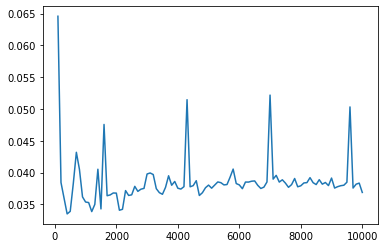

In [ ]:
import time

# 실행시간 측정하기

In [ ]:
from matplotlib import pyplot as plt

# 도표 그리기